Dataset source: `https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents`

## USA Accidents Analysis

### Project overview
- Perform exploratory data analysis (EDA) on US traffic accident data.
- Understand the dataset (source, what it contains, why it is useful).
- Identify key patterns and risk factors related to accidents.

**Dataset**
- Source: Kaggle
- Content: Historical records of traffic accidents in the USA
- Usefulness: Can be used to understand accident patterns and inform prevention strategies

**Objective**  
Analyze US traffic accident data to identify key factors influencing accident frequency and severity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset 

In [2]:
df = pd.read_csv("US_Accidents_March23.csv",low_memory=True)


# Cleaning and Preparing the Dataset
- Inspect basic information about the data
- Check each column and its data type
- Identify and handle missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Counting Missing Values

In [5]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

## Dropping columns with the most missing values
- `End_Lat`
- `End_Lng`
- `Temperature(F)`
- `Wind_Chill(F)`
- `Precipitation(in)`
- `Wind_Speed(mph)`

In [6]:
df.drop(columns=["End_Lat","End_Lng","Temperature(F)","Wind_Chill(F)","Precipitation(in)","Wind_Speed(mph)"],inplace=True)
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
num_col = df.select_dtypes(include=["number"]).columns
print(f"Number of numerical columns is {len(num_col)}")

Number of numerical columns is 7


In [8]:
missing_percentage = (df.isna().sum() / len(df)) * 100 #calculating percentage of missing values
missing_percentage = (missing_percentage[missing_percentage != 0]) # dropping rows where missing values do not exist
df["Time"] = df["Sunrise_Sunset"] 
missing_percentage

Description              0.000065
Street                   0.140637
City                     0.003274
Zipcode                  0.024779
Timezone                 0.101030
Airport_Code             0.292881
Weather_Timestamp        1.555666
Humidity(%)              2.253301
Pressure(in)             1.820288
Visibility(mi)           2.291524
Wind_Direction           2.267043
Weather_Condition        2.244438
Sunrise_Sunset           0.300787
Civil_Twilight           0.300787
Nautical_Twilight        0.300787
Astronomical_Twilight    0.300787
dtype: float64

## Analyzing city-level data
- How many accidents occur in each city?
- Which cities have the highest number of accidents?

In [9]:
acc_city = df["City"].value_counts().sort_values(ascending=False)
acc_city


City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Tamms                 1
Fort Recovery         1
Odonnell              1
Immaculata            1
Rich                  1
Name: count, Length: 13678, dtype: int64

Miami, Houston, Los Angeles, Charlotte, Dallas and Orlando are among the cities with the highest number of accidents.

In [10]:
city_most_accidents = acc_city[acc_city>2000] #calculating cities having most accidents
(len(city_most_accidents)/len(df["City"]))
cities_least_accidents = acc_city[acc_city<=2000] #calculating cities having least accidents
cities_least_accidents

City
Willowbrook          1997
Altamonte Springs    1995
Fayetteville         1993
Port Allen           1992
Chico                1992
                     ... 
Tamms                   1
Fort Recovery           1
Odonnell                1
Immaculata              1
Rich                    1
Name: count, Length: 13029, dtype: int64

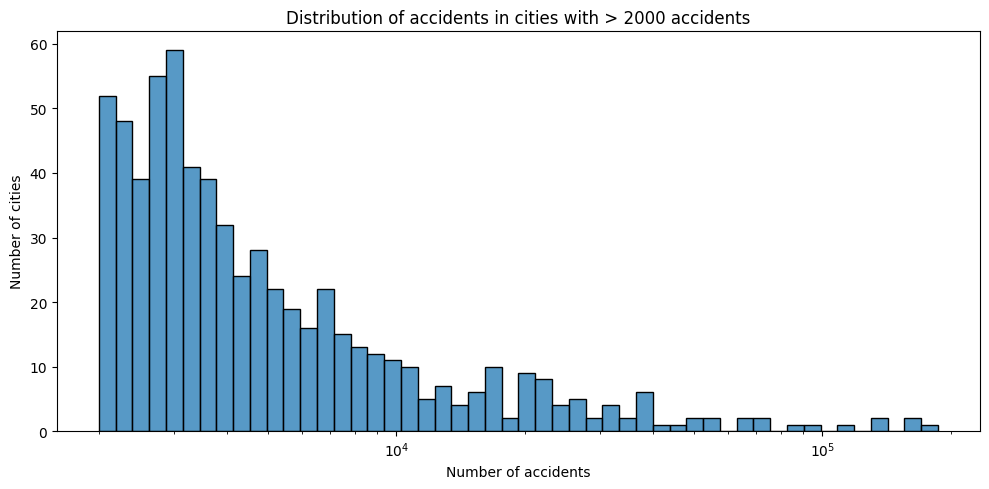

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(city_most_accidents, bins=50, log_scale=True)
plt.title("Distribution of accidents in cities with > 2000 accidents")
plt.xlabel("Number of accidents")
plt.ylabel("Number of cities")
plt.tight_layout()
plt.show()

From this graph:
- Only a small number of cities have a very large number of accidents.
- Most cities have comparatively fewer accidents.

## Analyzing
- How often cities with the highest number of accidents belong to the same state

In [12]:
city_counts = df.groupby(["City", "State"]).size().reset_index(name="AccidentCount")
city_counts.sort_values(by="AccidentCount")
top_100_cities = city_counts.sort_values(by="AccidentCount", ascending=False).head(100)
top_100_cities

,City,State,AccidentCount
11609,Miami,FL,186768
8484,Houston,TX,169428
10474,Los Angeles,CA,156491
3125,Charlotte,NC,138345
4339,Dallas,TX,130303
...,...,...,...
6542,Fremont,CA,9664
2318,Buffalo,NY,9574
17928,Tempe,AZ,9531
6697,Gardena,CA,9479


In [13]:
freq_state = top_100_cities["State"].value_counts()
freq_state.head()

State
CA    23
FL    15
TX     6
SC     5
NY     5
Name: count, dtype: int64

<Axes: ylabel='State'>

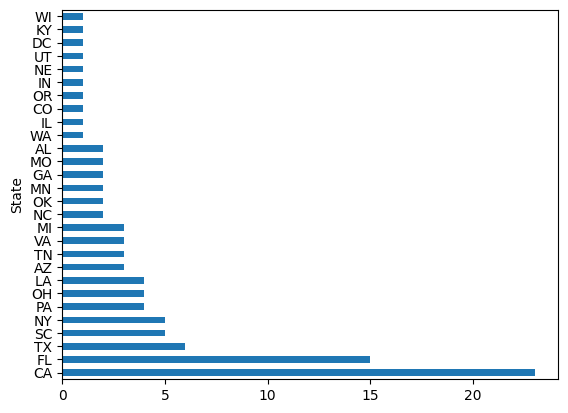

In [14]:
freq_state.plot(kind="barh")

##### Insights:
- California and Florida are states from which most accident-prone cities belong most frequently.

##### Might be due to:
- These are the 1st and 3rd most populous states. So more drivers and vehicles mean higher chances of accidents.
- Both have older populations, so older drivers have less reaction time.
- California has a high speed limit of 70 mph, which increases the risk of accidents.
- Florida's weather conditions may be the key reason.

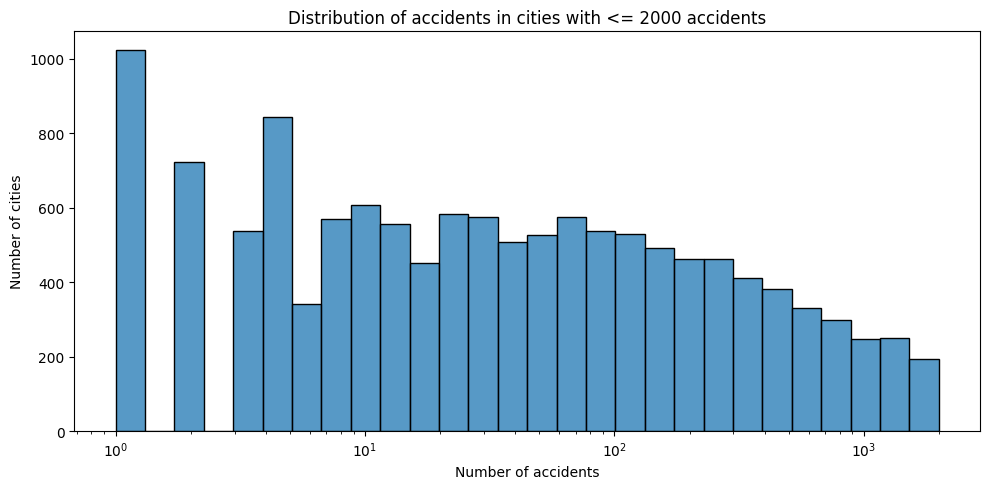

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(cities_least_accidents, log_scale=True)
plt.title("Distribution of accidents in cities with <= 2000 accidents")
plt.xlabel("Number of accidents")
plt.ylabel("Number of cities")
plt.tight_layout()
plt.show()

From this graph:
- The number of accidents per city keeps decreasing and becomes very small for most cities.
- More than 1,000 cities have fewer than 200 accidents.

In [16]:
df["State"]

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object

## Histogram of accidents per city
- To see how accidents are distributed across cities
- To understand whether more cities have a high or low number of accidents

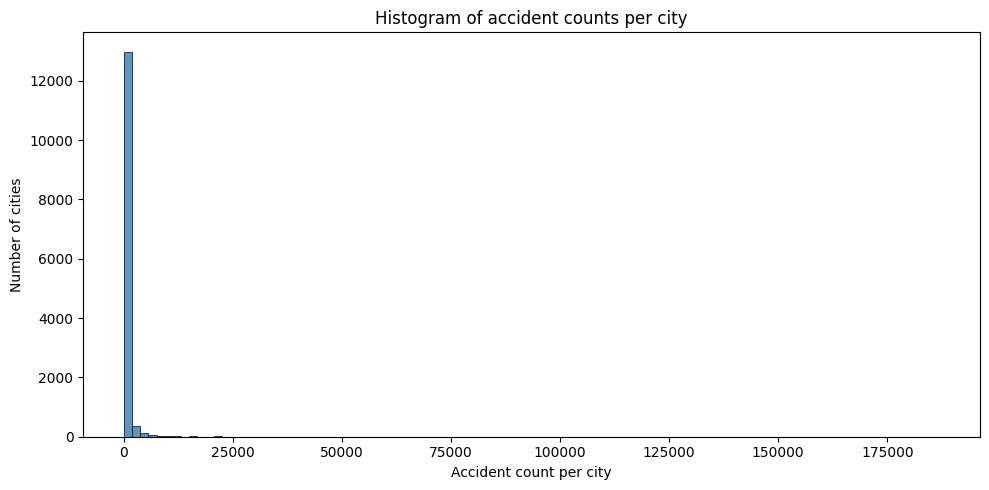

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(acc_city.values, bins=100)
plt.title("Histogram of accident counts per city")
plt.xlabel("Accident count per city")
plt.ylabel("Number of cities")
plt.tight_layout()
plt.show()

From this graph:
- Accidents keep decreasing as we move forward in cities.
- Most cities have only one accident.

# Analyzing the `Start_Time` column

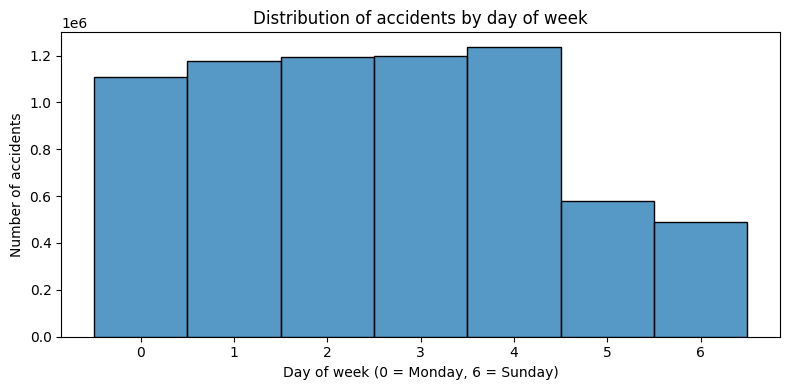

In [18]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
plt.figure(figsize=(8, 4))
sns.histplot(df["Start_Time"].dt.dayofweek, bins=7, discrete=True)
plt.title("Distribution of accidents by day of week")
plt.xlabel("Day of week (0 = Monday, 6 = Sunday)")
plt.ylabel("Number of accidents")
plt.tight_layout()
plt.show()

From this graph:
- On weekends, accidents are relatively much less frequent because on weekends most people stay at home, so traffic is less.

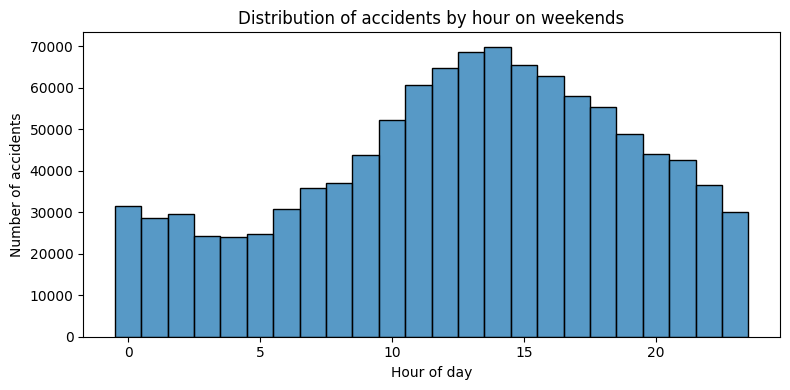

In [19]:
accidents_on_weekends = df.loc[
    df["Start_Time"].dt.dayofweek.isin([5, 6]),
    "Start_Time"
]

plt.figure(figsize=(8, 4))
sns.histplot(accidents_on_weekends.dt.hour, bins=24, discrete=True)
plt.title("Distribution of accidents by hour on weekends")
plt.xlabel("Hour of day")
plt.ylabel("Number of accidents")
plt.tight_layout()
plt.show()

From this graph:
- On weekends, accidents occur between 10 am and 3 pm because people wake up late and then go out.

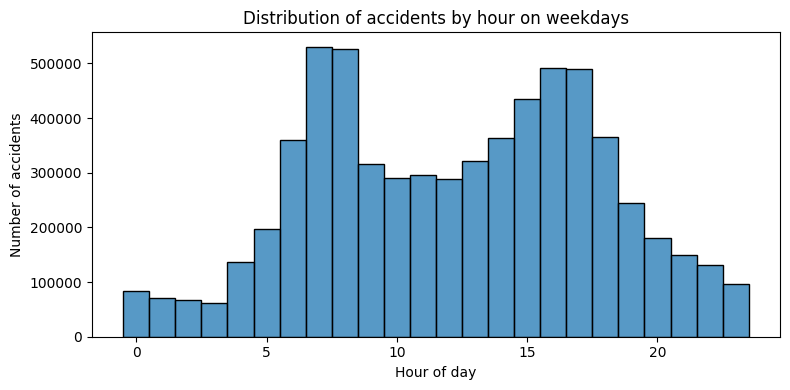

In [20]:
accidents_on_weekdays = df.loc[
    df["Start_Time"].dt.dayofweek.isin([0,1,2,3,4,5]),
    "Start_Time"
]

plt.figure(figsize=(8, 4))
sns.histplot(accidents_on_weekdays.dt.hour, bins=24, discrete=True)
plt.title("Distribution of accidents by hour on weekdays")
plt.xlabel("Hour of day")
plt.ylabel("Number of accidents")
plt.tight_layout()
plt.show()

From this graph:
- On weekdays, 6 am to 9 am and 3 pm to 5 pm are the most accident-prone times.


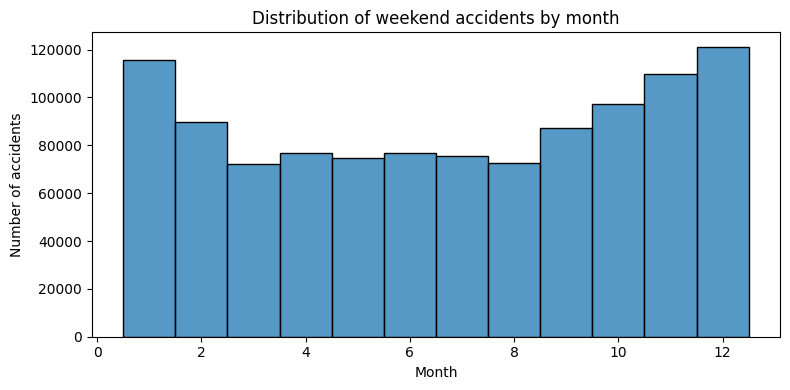

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(accidents_on_weekends.dt.month, bins=12, discrete=True)
plt.title("Distribution of weekend accidents by month")
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.tight_layout()
plt.show()

### State-level analysis
- Check which states have the highest number of accidents

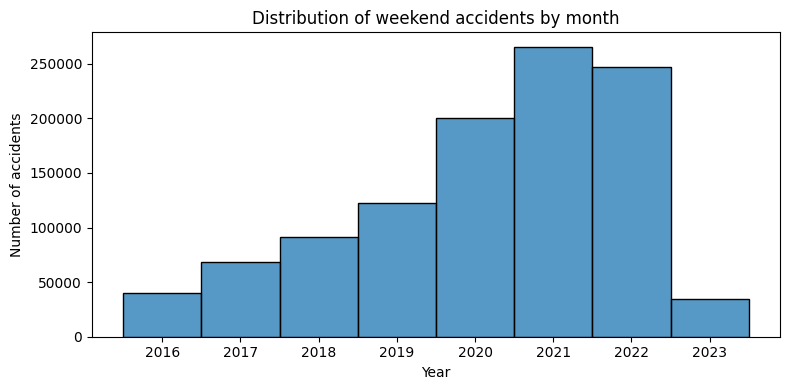

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(accidents_on_weekends.dt.year, bins=12, discrete=True)
plt.title("Distribution of weekend accidents by month")
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.tight_layout()
plt.show()

From This Graph:

- From 2016 to 2022 accidents goes on increasing and then suddenly in 2023 it decreased


MAy Be Due To:

- In 2023 Goverment introduced ADAS(Advaance Driver Automatic System)
- Before 2023 most roads were empty due pendemic so people used to drive car at very high speed but in 2023 roads again become full of veichle 


In [23]:
df["State"].unique()


array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [24]:
highest_accident_state = df["State"].value_counts()
highest_accident_state = highest_accident_state[highest_accident_state>157722.32653061225] # States having higher accidents than mean accidents per State
highest_accident_state

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
Name: count, dtype: int64

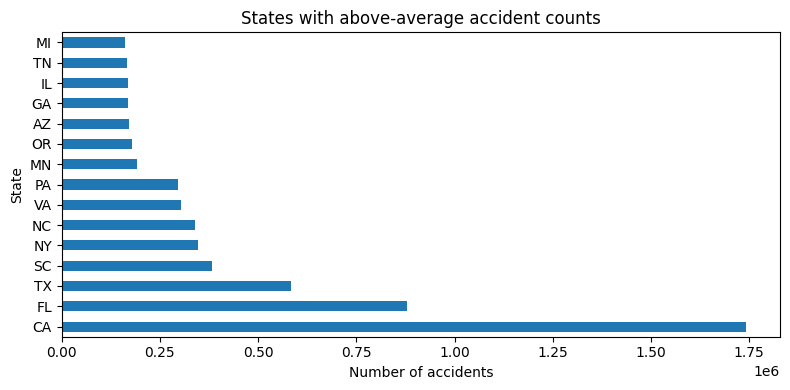

In [25]:
plt.figure(figsize=(8, 4))
highest_accident_state.plot(kind="barh")
plt.title("States with above-average accident counts")
plt.xlabel("Number of accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()

From this graph:
- California, Texas, Florida, and New York are among the states with the highest number of accidents.
- California has the highest number of accidents overall.

## Analyzing weather data

In [26]:
(df["Weather_Condition"].unique())


array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [27]:
highest_accident_weather = df["Weather_Condition"].value_counts().head(20)

In which weather conditions do more severe accidents occur?

In [28]:
df["Visibility(mi)"].nunique()


92

In [29]:
severity_weather_count = (
    df.groupby(['Weather_Condition', 'Severity'])
      .size()
      .unstack(fill_value=0)
)

severity_weather_count


Severity,1,2,3,4
Weather_Condition,,,,
Blowing Dust,1,171,17,0
Blowing Dust / Windy,8,231,19,8
Blowing Sand,0,1,1,0
Blowing Snow,0,567,134,39
Blowing Snow / Windy,0,884,17,24
...,...,...,...,...
Volcanic Ash,0,20,2,0
Widespread Dust,1,147,30,3
Widespread Dust / Windy,0,22,2,0


In [30]:
avg_severity = (
    df.groupby('Weather_Condition')['Severity']
      .mean()
      .sort_values(ascending=False)
)

avg_severity


Weather_Condition
Light Blowing Snow             3.666667
Patches of Fog / Windy         3.142857
Heavy Freezing Rain / Windy    3.000000
Light Fog                      3.000000
Partial Fog / Windy            3.000000
                                 ...   
Sand / Dust Whirls Nearby      2.000000
Sleet and Thunder              2.000000
Mist / Windy                   2.000000
Thunder and Hail               1.928571
Light Rain Shower / Windy      1.875000
Name: Severity, Length: 144, dtype: float64

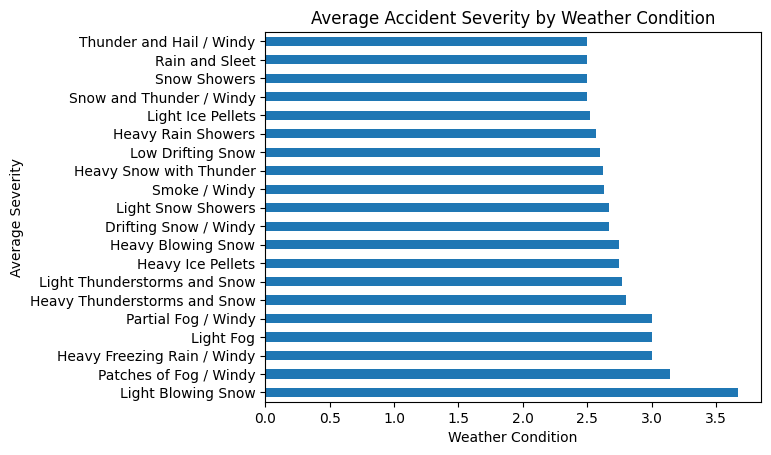

In [31]:
avg_severity.head(20).plot(kind='barh')
plt.ylabel('Average Severity')
plt.xlabel('Weather Condition')
plt.title('Average Accident Severity by Weather Condition')
plt.show()


From this graph:
- Overall, the severity of accidents remains almost the same with minor changes.
- Foggy, snowy, and windy weather conditions have comparatively high accident severity.

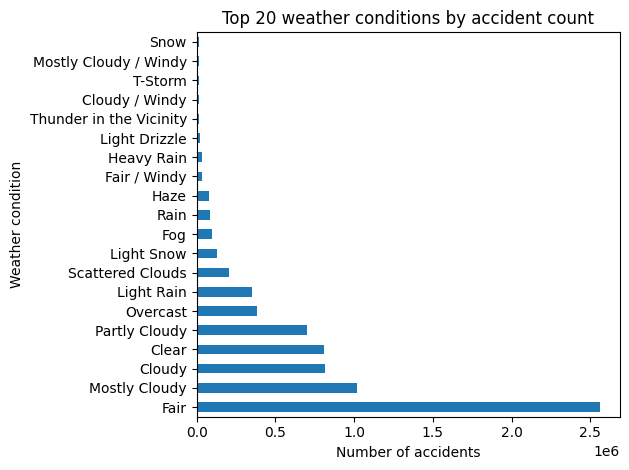

In [32]:
df["Weather_Condition"].value_counts().head(20).plot(kind="barh")
plt.title("Top 20 weather conditions by accident count")
plt.xlabel("Number of accidents")
plt.ylabel("Weather condition")
plt.tight_layout()
plt.show()

From this graph:
- Most accidents occur in cloudy and rainy weather conditions.
- Other weather conditions have comparatively lower numbers of accidents.

## Columns analyzed
- `Weather_Condition`
- `State`
- `City`
- `Start_Time`

## Questions to explore

- Which state has the highest number of accidents?
- In which weather conditions do more accidents occur?
- How many accidents occur in each city?
- In the top 100 cities by number of accidents, which states do they most frequently belong to?
- At which times of day do more accidents occur?
- Which month has the most accidents?
- In which weather conditions do most accidents occur?
- What is the trend of accidents year by year (increasing/decreasing)?

## Conclusions

**Key insights**
- Less than 9% of cities have 2,000 or more yearly accidents.
- Over 1,000 cities report only one accident in the dataset.
- The number of accidents per city decreases approximately exponentially.
- Top 100 cities with the highest number of accidents mostly belong to California and Florida (these are also the 1st and 3rd most populous states, respectively).
- A higher number of accidents occur in the morning (6 am to 9 am) and in the evening (3 pm to 6 pm).
- On weekends, more accidents occur between 10 am and 2 pm, while on weekdays, accidents peak between 6 am to 9 am and 3 pm to 9 pm.
- Most accidents occur in January, November, and December (likely influenced by winter weather and holiday-related travel/celebrations).
- From 2016 to 2022 accidents keep on increasing and then suddenly in 2023 accidents decreased  upto a reasonable number  
- States with the highest number of accidents include California, Texas, Florida, South Carolina, and New York. Some of these have high populations, but South Carolina has a relatively smaller population and still appears as one of the most accident-prone states.
- Most accidents occur in cloudy and rainy weather conditions.